# Import Library


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Database(csv) analysis and processing

In [2]:
data_train = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")
data_test = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")
data_dictionary = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

In [3]:
data_train.shape

(3960, 82)

In [4]:
data_train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [5]:
data_train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

**Show target column**

2736
            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
5     001f3379                    Spring               13                1   
...        ...                       ...              ...              ...   
3953  ff6c2bb8                      Fall                8                0   
3954  ff759544                    Summer                7                1   
3955  ff8a2de4                      Fall               13                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physica

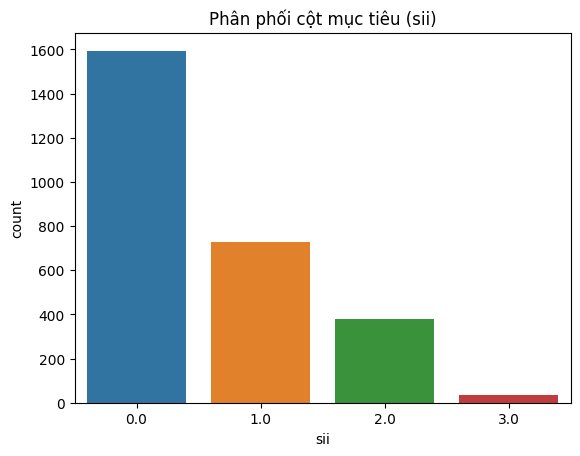

In [7]:
filtered_data = data_train[data_train['sii'].notna()]
print(filtered_data['sii'].count())
print(filtered_data)

sns.countplot(x='sii', data=filtered_data)
plt.title('Phân phối cột mục tiêu (sii)')
plt.show()

In [8]:
print('Columns missing in test:')
print([f for f in data_train.columns if f not in data_test.columns])

Columns missing in test:
['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii']


# Show and handle missing values¶- 
Drop features with the rate of missing values >= 30%

Số lượng giá trị thiếu:
 id                                          0
Basic_Demos-Enroll_Season                   0
Basic_Demos-Age                             0
Basic_Demos-Sex                             0
CGAS-Season                               394
                                         ... 
SDS-SDS_Total_Raw                         209
SDS-SDS_Total_T                           211
PreInt_EduHx-Season                        17
PreInt_EduHx-computerinternet_hoursday     82
sii                                         0
Length: 82, dtype: int64


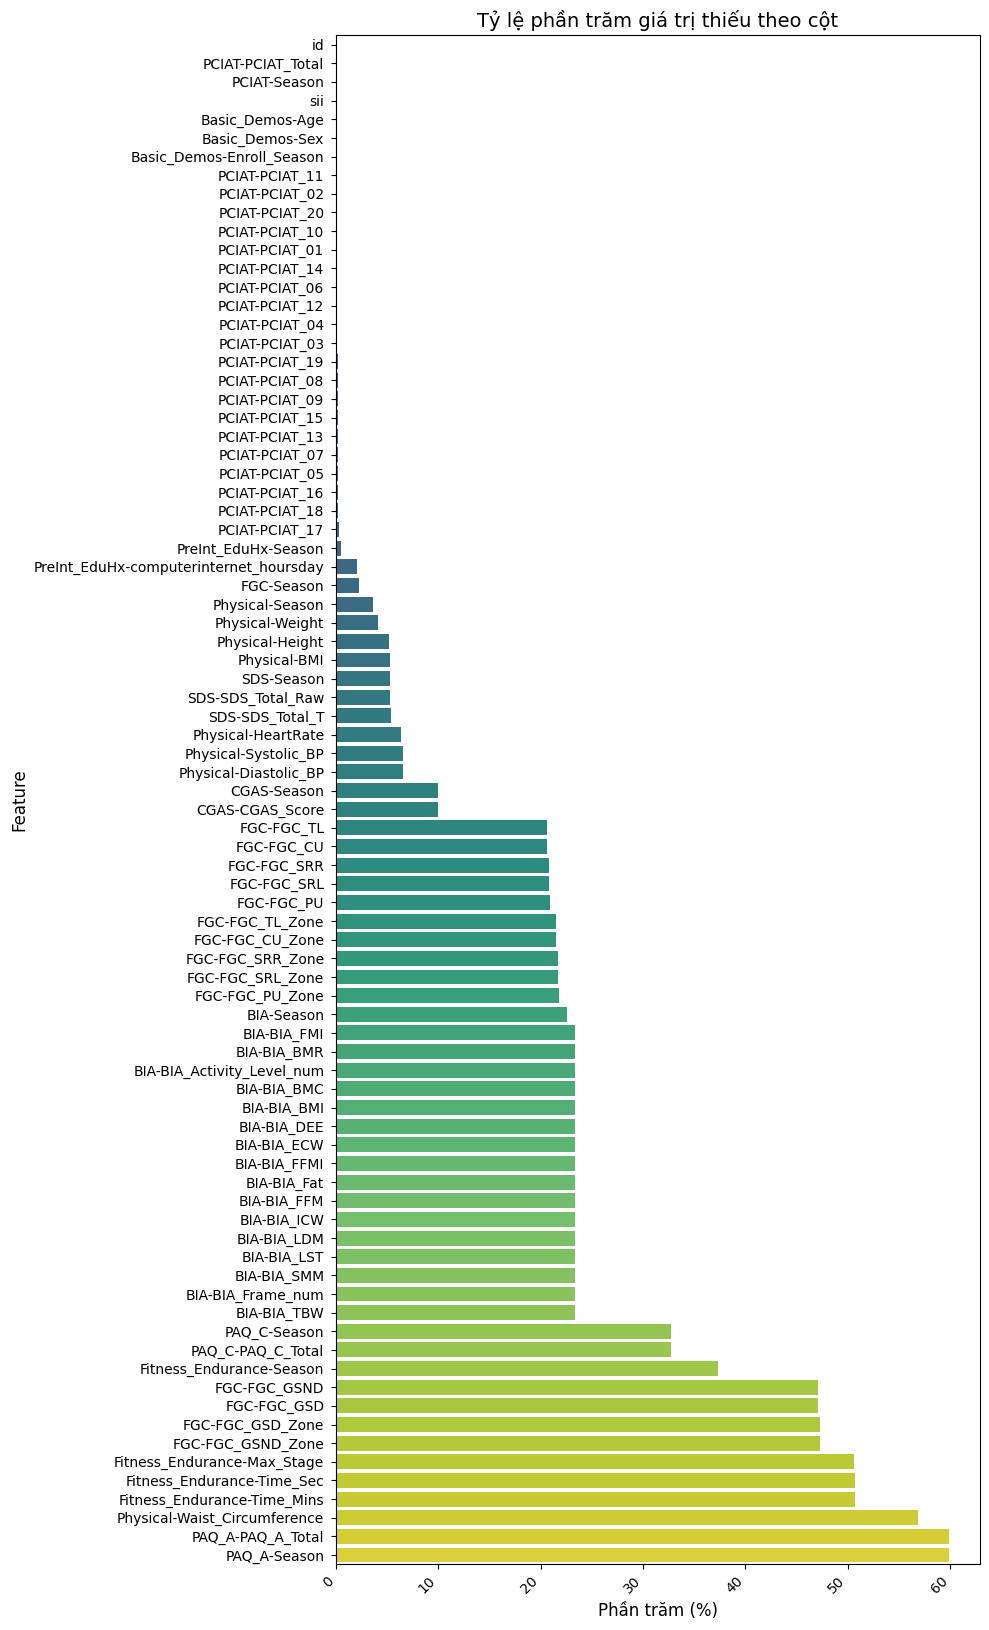

In [9]:
missing_values = filtered_data.isnull().sum()
print("Số lượng giá trị thiếu:\n", missing_values[missing_values >= 0])
missing_percent = (missing_values / len(data_train)) * 100

missing_data = pd.DataFrame({
    'Số lượng thiếu': missing_values,
    'Phần trăm (%)': missing_percent
})

missing_data = missing_data[missing_data['Số lượng thiếu'] >= 0]

missing_data_sort = missing_data.sort_values(by='Phần trăm (%)', ascending=True)

if missing_data_sort.empty:
    print("Không có cột nào có giá trị thiếu.")
else:
    plt.figure(figsize=(10, len(missing_data) * 0.2))
    sns.barplot(
        y=missing_data_sort.index, 
        x=missing_data_sort['Phần trăm (%)'], 
        palette="viridis"
    )
    plt.xticks(rotation=45, ha='right')
    plt.title("Tỷ lệ phần trăm giá trị thiếu theo cột", fontsize=14)
    plt.ylabel("Feature", fontsize=12)
    plt.xlabel("Phần trăm (%)", fontsize=12)

    plt.gca().yaxis.set_tick_params(labelsize=10, pad=5)
    plt.tight_layout()
    plt.show()

In [10]:
columns_to_drop = missing_data[missing_data['Phần trăm (%)'] > 30].index

print("Các feature có tỷ lệ giá trị thiếu lớn hơn 30%:")
print(columns_to_drop)

data_train_cleaned = data_train.drop(columns=columns_to_drop)

data_train_cleaned.info()

Các feature có tỷ lệ giá trị thiếu lớn hơn 30%:
Index(['Physical-Waist_Circumference', 'Fitness_Endurance-Season',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-Season', 'PAQ_C-PAQ_C_Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   C

- **Shows the relationship between a few features**
- The chart of Age Distribution
- The chart of Sex Distribution

       Basic_Demos-Age  Basic_Demos-Sex
count      3960.000000      3960.000000
mean         10.433586         0.372727
std           3.574648         0.483591
min           5.000000         0.000000
25%           8.000000         0.000000
50%          10.000000         0.000000
75%          13.000000         1.000000
max          22.000000         1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


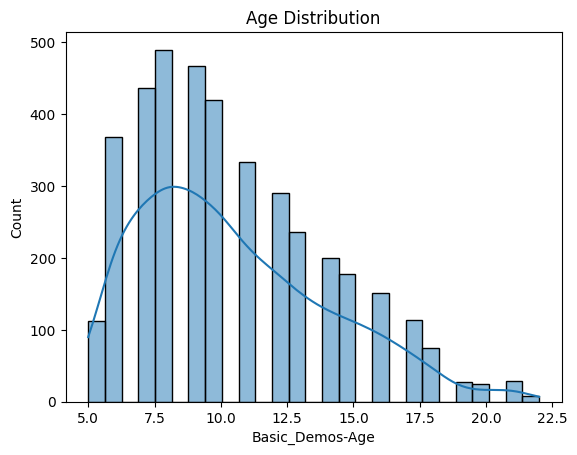

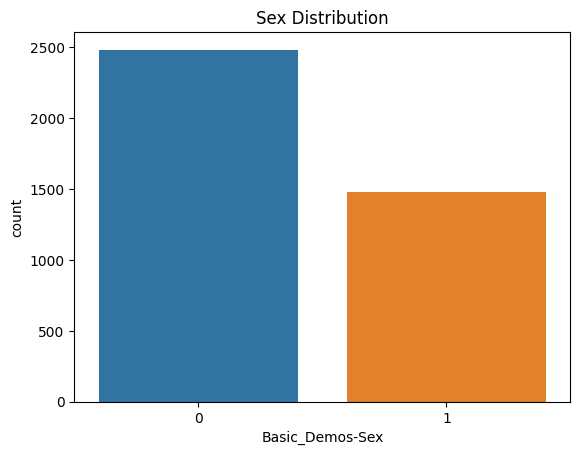

In [11]:
print(data_train[['Basic_Demos-Age', 'Basic_Demos-Sex']].describe())
sns.histplot(data_train['Basic_Demos-Age'], kde=True)
plt.title('Age Distribution')
plt.show()
sns.countplot(x='Basic_Demos-Sex', data=data_train)
plt.title('Sex Distribution')
plt.show()

# Fill databases and change types for a few features

In [12]:
# Use KNNImputer to fill features with types as float, int
knn_imputer = KNNImputer(n_neighbors=5)

num_cols = data_train_cleaned.select_dtypes(include=['float64', 'int64']).columns

data_train_cleaned[num_cols] = knn_imputer.fit_transform(data_train_cleaned[num_cols])

print(data_train_cleaned.isnull().sum())

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                            0
SDS-SDS_Total_T                              0
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday       0
sii                                          0
Length: 69, dtype: int64


In [13]:
# Use SimpleImputer to fill features with types as object
cat_cols = data_train_cleaned.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')

data_train_cleaned[cat_cols] = cat_imputer.fit_transform(data_train_cleaned[cat_cols])

print(data_train_cleaned.isnull().sum())

id                                        0
Basic_Demos-Enroll_Season                 0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS-Season                               0
                                         ..
SDS-SDS_Total_Raw                         0
SDS-SDS_Total_T                           0
PreInt_EduHx-Season                       0
PreInt_EduHx-computerinternet_hoursday    0
sii                                       0
Length: 69, dtype: int64


In [14]:
missing_values_train_after = data_train_cleaned.isnull().sum()
print("Missing values after imputation in train dataset:\n", missing_values_train_after)

Missing values after imputation in train dataset:
 id                                        0
Basic_Demos-Enroll_Season                 0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS-Season                               0
                                         ..
SDS-SDS_Total_Raw                         0
SDS-SDS_Total_T                           0
PreInt_EduHx-Season                       0
PreInt_EduHx-computerinternet_hoursday    0
sii                                       0
Length: 69, dtype: int64


**Show the relatives between features and target column**

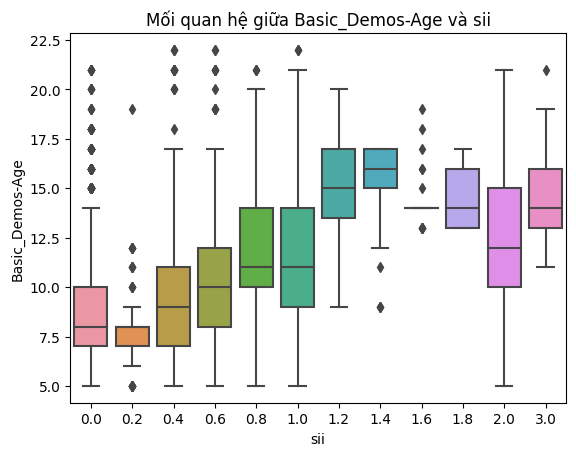

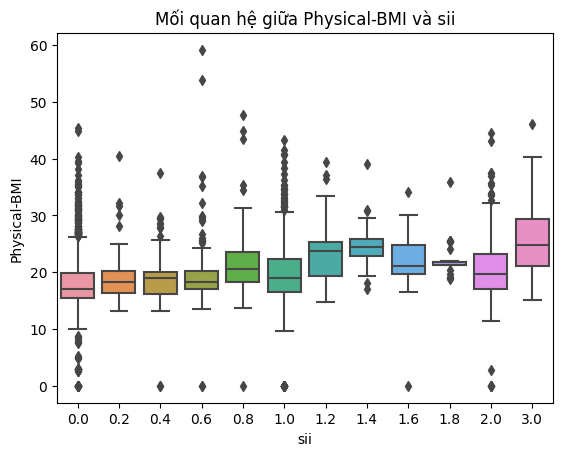

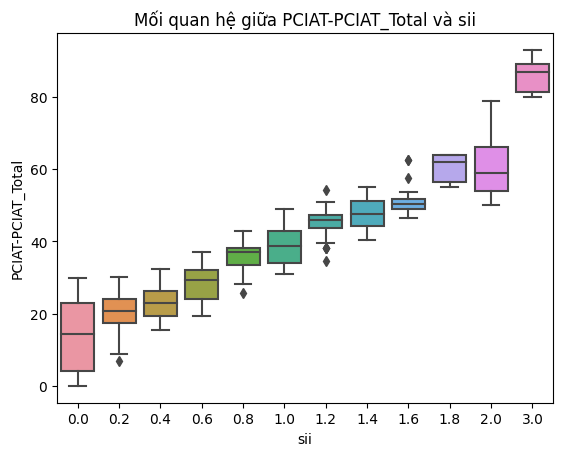

In [15]:
num_cols = ['Basic_Demos-Age', 'Physical-BMI', 'PCIAT-PCIAT_Total']
for col in num_cols:
    sns.boxplot(x='sii', y=col, data=data_train_cleaned)
    plt.title(f'Mối quan hệ giữa {col} và sii')
    plt.show()

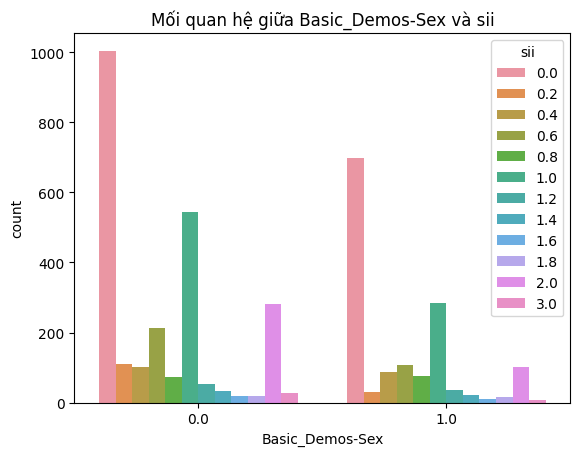

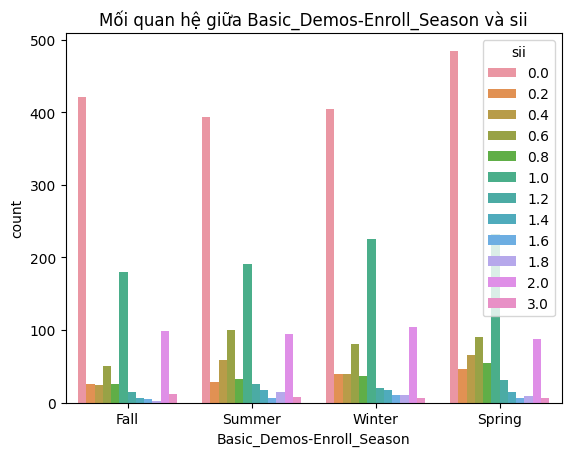

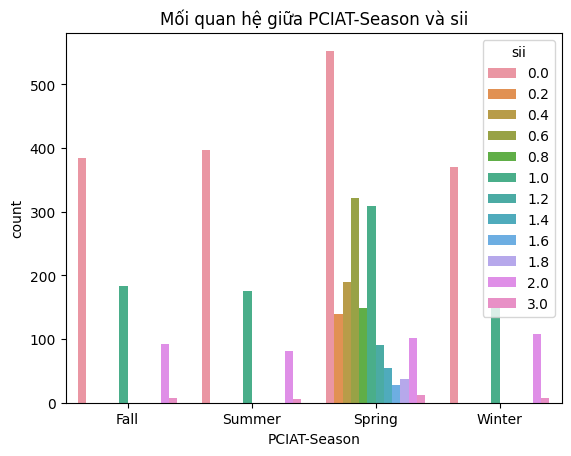

In [16]:
cat_cols = ['Basic_Demos-Sex', 'Basic_Demos-Enroll_Season', 'PCIAT-Season']
for col in cat_cols:
    sns.countplot(x=col, hue='sii', data=data_train_cleaned)
    plt.title(f'Mối quan hệ giữa {col} và sii')
    plt.show()

**Convert object data to float/int data**

In [17]:
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
season_cols = [col for col in data_train_cleaned.columns if 'Season' in col]
for col in season_cols:
    data_train_cleaned[col] = data_train_cleaned[col].map(season_mapping)


In [18]:
# Drop column id
data_train_no_id = data_train_cleaned.drop(columns = ['id'], errors = 'ignore')
data_train_no_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   int64  
 1   Basic_Demos-Age                         3960 non-null   float64
 2   Basic_Demos-Sex                         3960 non-null   float64
 3   CGAS-Season                             3960 non-null   int64  
 4   CGAS-CGAS_Score                         3960 non-null   float64
 5   Physical-Season                         3960 non-null   int64  
 6   Physical-BMI                            3960 non-null   float64
 7   Physical-Height                         3960 non-null   float64
 8   Physical-Weight                         3960 non-null   float64
 9   Physical-Diastolic_BP                   3960 non-null   float64
 10  Physical-HeartRate                      3960 non-null   floa

In [19]:
# Drop columns PCIAT-PCIAT
pciat_columns = [col for col in data_train_cleaned.columns if 'PCIAT-PCIAT' in col and col != 'PCIAT-PCIAT_Total']
corr_with_total = data_train_cleaned[pciat_columns].corrwith(data_train_cleaned['PCIAT-PCIAT_Total'])
print("Mối tương quan với PCIAT_PCIAT_TOTAL:")
print(corr_with_total)

data_train_no_id.drop(columns= pciat_columns, inplace=True)
data_train_cleaned.drop(columns= pciat_columns, inplace=True)

Mối tương quan với PCIAT_PCIAT_TOTAL:
PCIAT-PCIAT_01    0.683416
PCIAT-PCIAT_02    0.777495
PCIAT-PCIAT_03    0.799416
PCIAT-PCIAT_04    0.626255
PCIAT-PCIAT_05    0.806281
PCIAT-PCIAT_06    0.702859
PCIAT-PCIAT_07    0.520470
PCIAT-PCIAT_08    0.756867
PCIAT-PCIAT_09    0.718326
PCIAT-PCIAT_10    0.740322
PCIAT-PCIAT_11    0.691186
PCIAT-PCIAT_12    0.419041
PCIAT-PCIAT_13    0.744924
PCIAT-PCIAT_14    0.715662
PCIAT-PCIAT_15    0.803434
PCIAT-PCIAT_16    0.724021
PCIAT-PCIAT_17    0.803757
PCIAT-PCIAT_18    0.765168
PCIAT-PCIAT_19    0.720575
PCIAT-PCIAT_20    0.739292
dtype: float64


In [20]:
def feature_engineering(df):
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['BFP_BMI'] = df['BIA-BIA_Fat'] / df['BIA-BIA_BMI']
    df['FFMI_BFP'] = df['BIA-BIA_FFMI'] / df['BIA-BIA_Fat']
    df['FMI_BFP'] = df['BIA-BIA_FMI'] / df['BIA-BIA_Fat']
    df['LST_TBW'] = df['BIA-BIA_LST'] / df['BIA-BIA_TBW']
    df['BFP_BMR'] = df['BIA-BIA_Fat'] * df['BIA-BIA_BMR']
    df['BFP_DEE'] = df['BIA-BIA_Fat'] * df['BIA-BIA_DEE']
    df['BMR_Weight'] = df['BIA-BIA_BMR'] / df['Physical-Weight']
    df['DEE_Weight'] = df['BIA-BIA_DEE'] / df['Physical-Weight']
    df['SMM_Height'] = df['BIA-BIA_SMM'] / df['Physical-Height']
    df['Muscle_to_Fat'] = df['BIA-BIA_SMM'] / df['BIA-BIA_FMI']
    df['Hydration_Status'] = df['BIA-BIA_TBW'] / df['Physical-Weight']
    df['ICW_TBW'] = df['BIA-BIA_ICW'] / df['BIA-BIA_TBW']
    df['BMI_PHR'] = df['Physical-BMI'] * df['Physical-HeartRate']
    
    return df

data_train_no_id = feature_engineering(data_train_no_id)

- **Show heatmap of database**
- **Drop feature with threshold > 0.8**

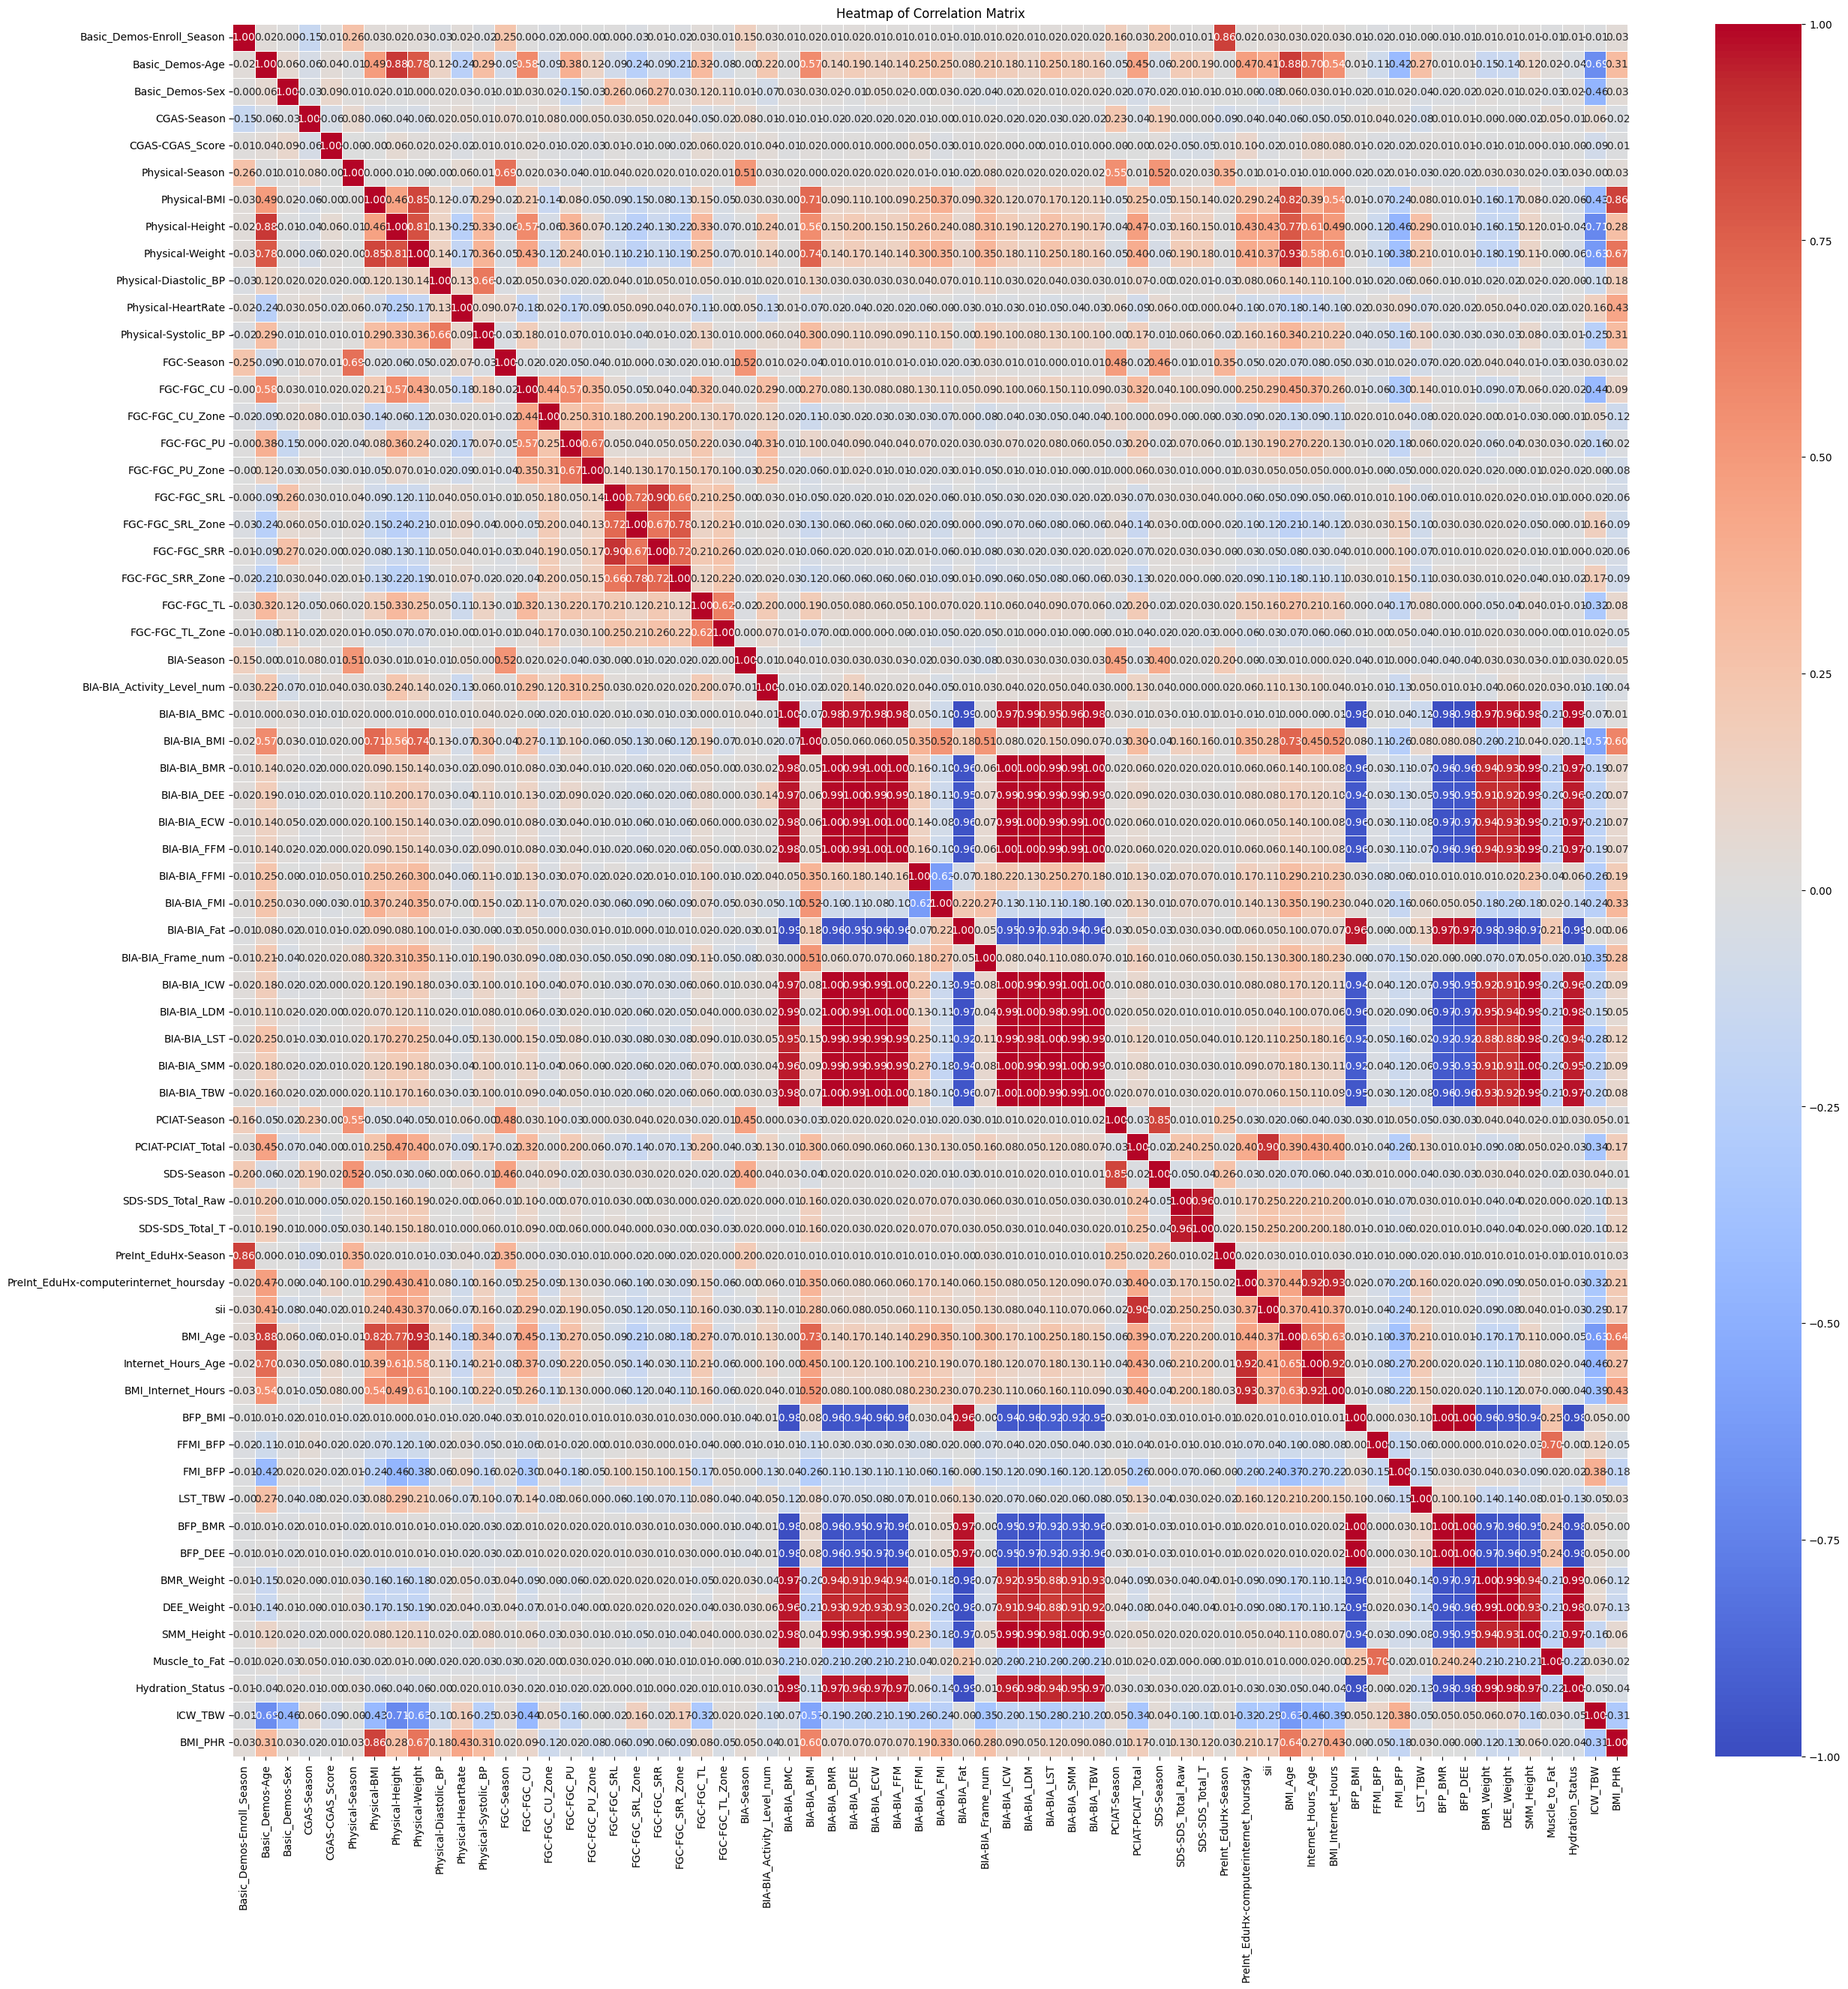

In [21]:
corr_matrix = data_train_no_id.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [22]:
threshold = 0.8

to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

to_drop.discard('sii')

data_train_cleaned = feature_engineering(data_train_cleaned)
data_train_cleaned = data_train_cleaned.drop(columns=to_drop)

print(f"Những cột đã bị loại bỏ: {to_drop}")
print(data_train_cleaned.shape)  

data_train_cleaned = data_train_cleaned.drop(columns=['PCIAT-Season', 'PCIAT-PCIAT_Total'])

Những cột đã bị loại bỏ: {'BIA-BIA_TBW', 'BFP_BMR', 'BMI_Internet_Hours', 'DEE_Weight', 'BIA-BIA_DEE', 'Internet_Hours_Age', 'BIA-BIA_LST', 'BFP_DEE', 'Physical-Height', 'FGC-FGC_SRR', 'BMR_Weight', 'BIA-BIA_Fat', 'BIA-BIA_BMR', 'BFP_BMI', 'SDS-Season', 'BMI_PHR', 'BIA-BIA_ECW', 'BMI_Age', 'BIA-BIA_LDM', 'SDS-SDS_Total_T', 'BIA-BIA_ICW', 'BIA-BIA_FFM', 'PreInt_EduHx-Season', 'SMM_Height', 'Hydration_Status', 'BIA-BIA_SMM', 'Physical-Weight'}
(3960, 38)


# Database(parquet) analysis and processing - Actigraphy (time series)


In [23]:
actigraphy = pl.read_parquet('/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0417c91e/part-0.parquet')
actigraphy

step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
u32,f32,f32,f32,f32,f32,f32,f32,f32,i64,i8,i8,f32
0,0.014375,-0.020112,-0.995358,0.00106,-88.445251,0.0,41.0,4195.0,44100000000000,2,2,5.0
1,0.014167,-0.023278,-0.996164,0.000289,-88.3722,0.0,41.0,4194.833496,44105000000000,2,2,5.0
2,0.014036,-0.022964,-0.99632,0.000301,-88.356422,0.0,41.5,4194.666504,44110000000000,2,2,5.0
3,0.013593,-0.022048,-0.996762,0.002278,-88.575943,0.0,37.5,4194.5,44115000000000,2,2,5.0
4,-0.061772,-0.065317,-0.973063,0.092321,-88.391273,0.0,55.666668,4199.0,44780000000000,2,2,5.0
…,…,…,…,…,…,…,…,…,…,…,…,…
287174,-0.407433,0.091612,-0.377763,0.039733,-43.319416,0.0,7.0,3695.0,32875000000000,1,3,53.0
287175,-0.703572,0.016187,0.15956,0.03598,14.12139,0.0,7.0,3695.0,32880000000000,1,3,53.0
287176,-0.209607,-0.4697,0.636573,0.097799,44.998573,0.0,7.0,3695.0,32885000000000,1,3,53.0


In [24]:
import random
import os
import torch
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim

# Seed for reproducibility
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
seed_everything(2024)

# Function to load and process files
def process_file(filename, dirname):
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    return df.describe().values.reshape(-1), filename.split('=')[1]

# Optimized loading time series
def load_time_series(dirname) -> pd.DataFrame:
    ids = os.listdir(dirname)
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_file(fname, dirname), ids), total=len(ids)))
    
    stats, indexes = zip(*results)
    df = pd.DataFrame(stats, columns=[f"stat_{i}" for i in range(len(stats[0]))])
    df['id'] = indexes
    return df

# AutoEncoder class
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim * 3), nn.ReLU(),
            nn.Linear(encoding_dim * 3, encoding_dim * 2), nn.ReLU(),
            nn.Linear(encoding_dim * 2, encoding_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim * 2), nn.ReLU(),
            nn.Linear(input_dim * 2, input_dim * 3), nn.ReLU(),
            nn.Linear(input_dim * 3, input_dim), nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Optimized Autoencoder Training Function
def perform_autoencoder(df, encoding_dim=50, epochs=50, batch_size=32):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    data_tensor = torch.FloatTensor(df_scaled)
    
    input_dim = data_tensor.shape[1]
    autoencoder = AutoEncoder(input_dim, encoding_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters())
    
    for epoch in range(epochs):
        for i in range(0, len(data_tensor), batch_size):
            batch = data_tensor[i:i + batch_size]
            optimizer.zero_grad()
            reconstructed = autoencoder(batch)
            loss = criterion(reconstructed, batch)
            loss.backward()
            optimizer.step()
            
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    
    with torch.no_grad():
        encoded_data = autoencoder.encoder(data_tensor).numpy()
    df_encoded = pd.DataFrame(encoded_data, columns=[f'Enc_{i + 1}' for i in range(encoded_data.shape[1])])
    return df_encoded

train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
sample = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv')

train_ts = load_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet")
test_ts = load_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet")

100%|██████████| 2/2 [00:00<00:00,  8.92it/s]


In [25]:
df_train = train_ts.drop('id', axis=1)
df_test = test_ts.drop('id', axis=1)

train_ts_encoded = perform_autoencoder(df_train, encoding_dim=60, epochs=100, batch_size=32)
test_ts_encoded = perform_autoencoder(df_test, encoding_dim=60, epochs=100, batch_size=32)

train_ts_encoded["id"] = train_ts["id"]
test_ts_encoded['id'] = test_ts["id"]

data_cleaned = pd.merge(data_train_cleaned, train_ts_encoded, how="left", on='id')
test = pd.merge(test, test_ts_encoded, how="left", on='id')


Epoch [10/100], Loss: 1.6378
Epoch [20/100], Loss: 1.5450
Epoch [30/100], Loss: 1.5127
Epoch [40/100], Loss: 1.5011
Epoch [50/100], Loss: 1.5013
Epoch [60/100], Loss: 1.5026
Epoch [70/100], Loss: 1.4933
Epoch [80/100], Loss: 1.4747
Epoch [90/100], Loss: 1.4714
Epoch [100/100], Loss: 1.4555
Epoch [10/100], Loss: 1.0070
Epoch [20/100], Loss: 0.5783
Epoch [30/100], Loss: 0.4271
Epoch [40/100], Loss: 0.4271
Epoch [50/100], Loss: 0.4271
Epoch [60/100], Loss: 0.4271
Epoch [70/100], Loss: 0.4271
Epoch [80/100], Loss: 0.4271
Epoch [90/100], Loss: 0.4271
Epoch [100/100], Loss: 0.4271


In [26]:
data_cleaned

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,...,Enc_51,Enc_52,Enc_53,Enc_54,Enc_55,Enc_56,Enc_57,Enc_58,Enc_59,Enc_60
0,00008ff9,3,5.0,0.0,4,51.0,3,16.877316,61.2,86.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000fd460,2,9.0,0.0,1,70.0,3,14.035590,75.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00105258,2,10.0,1.0,3,71.0,3,16.648696,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00115b9f,4,9.0,0.0,3,71.0,2,18.292347,60.0,97.0,...,0.590492,1.065462,1.234016,0.000000,0.0,3.349180,1.690656,2.483185,5.593308,1.066349
4,0016bb22,1,18.0,1.0,2,62.2,1,20.630858,63.4,79.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,3,13.0,0.0,1,60.0,3,16.362460,71.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3956,ffa9794a,4,10.0,0.0,1,59.4,1,18.764678,60.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3957,ffcd4dbd,3,11.0,0.0,1,68.0,4,21.441500,79.0,99.0,...,0.000000,2.595756,0.397466,2.183397,0.0,0.472042,0.393381,0.000000,0.000000,1.932896
3958,ffed1dd5,1,13.0,0.0,1,70.0,4,12.235895,59.0,61.0,...,8.886406,0.000000,1.545543,4.781497,0.0,0.000000,0.000000,0.387618,0.758343,1.940165


In [27]:
# Create new data for test
test = feature_engineering(test)

test

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,LST_TBW,BFP_BMR,BFP_DEE,BMR_Weight,DEE_Weight,SMM_Height,Muscle_to_Fat,Hydration_Status,ICW_TBW,BMI_PHR
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,1.190475,8591.822097,13746.944840,18.356260,29.370079,0.424811,6.383063,0.643522,0.747453,NaN
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,1.458119,3719.320478,5950.914352,20.362087,32.579348,0.321056,12.718037,0.588157,0.777492,982.491320
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1564.977430
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,1.281264,21298.377749,36207.411592,13.865564,23.571569,0.472854,6.274343,0.563684,0.661008,1774.357653
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,1.262516,90468.027355,135701.701175,11.862478,17.793672,0.594629,2.621003,0.562625,0.521399,1626.436495
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,1.259274,24254.018580,38806.515140,13.426241,21.482033,0.476285,5.278294,0.558169,0.654233,1631.843107
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,1.265839,19172.581896,30676.066044,14.014727,22.423515,0.485536,8.840947,0.599486,0.565344,1517.515782
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
knn_imputer = KNNImputer(n_neighbors=5)

num_cols = data_cleaned.select_dtypes(include=['int32', 'int64', 'float64', 'int64']).columns

data_cleaned[num_cols] = knn_imputer.fit_transform(data_cleaned[num_cols])

data_cleaned = data_cleaned.dropna(thresh=10, axis=0)

print(data_cleaned.isnull().sum())

id                              0
Basic_Demos-Enroll_Season       0
Basic_Demos-Age                 0
Basic_Demos-Sex                 0
CGAS-Season                     0
                             ... 
Enc_56                       2964
Enc_57                       2964
Enc_58                       2964
Enc_59                       2964
Enc_60                       2964
Length: 96, dtype: int64


In [29]:
data_cleaned.drop('id', axis=1)
data_cleaned

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,...,Enc_51,Enc_52,Enc_53,Enc_54,Enc_55,Enc_56,Enc_57,Enc_58,Enc_59,Enc_60
0,00008ff9,3.0,5.0,0.0,4.0,51.0,3.0,16.877316,61.2,86.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000fd460,2.0,9.0,0.0,1.0,70.0,3.0,14.035590,75.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00105258,2.0,10.0,1.0,3.0,71.0,3.0,16.648696,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00115b9f,4.0,9.0,0.0,3.0,71.0,2.0,18.292347,60.0,97.0,...,0.590492,1.065462,1.234016,0.000000,0.0,3.349180,1.690656,2.483185,5.593308,1.066349
4,0016bb22,1.0,18.0,1.0,2.0,62.2,1.0,20.630858,63.4,79.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,3.0,13.0,0.0,1.0,60.0,3.0,16.362460,71.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3956,ffa9794a,4.0,10.0,0.0,1.0,59.4,1.0,18.764678,60.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3957,ffcd4dbd,3.0,11.0,0.0,1.0,68.0,4.0,21.441500,79.0,99.0,...,0.000000,2.595756,0.397466,2.183397,0.0,0.472042,0.393381,0.000000,0.000000,1.932896
3958,ffed1dd5,1.0,13.0,0.0,1.0,70.0,4.0,12.235895,59.0,61.0,...,8.886406,0.000000,1.545543,4.781497,0.0,0.000000,0.000000,0.387618,0.758343,1.940165


In [30]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 96 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   float64
 2   Basic_Demos-Age                         3960 non-null   float64
 3   Basic_Demos-Sex                         3960 non-null   float64
 4   CGAS-Season                             3960 non-null   float64
 5   CGAS-CGAS_Score                         3960 non-null   float64
 6   Physical-Season                         3960 non-null   float64
 7   Physical-BMI                            3960 non-null   float64
 8   Physical-Diastolic_BP                   3960 non-null   float64
 9   Physical-HeartRate                      3960 non-null   float64
 10  Physical-Systolic_BP                    3960 non-null   floa

In [31]:

def filter_test_data(train_data, test_data, target_column):
    train_columns = [col for col in train_data.columns if col != target_column]
    
    test_data_filtered = test_data[train_columns]
    
    return test_data_filtered

test = filter_test_data (data_cleaned, test, 'sii')
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
season_cols = [col for col in test.columns if 'Season' in col]
for col in season_cols:
    test[col] = test[col].map(season_mapping)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 95 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     int64  
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     float64
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     float64
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Diastolic_BP                   11 non-null     float64
 9   Physical-HeartRate                      12 non-null     float64
 10  Physical-Systolic_BP                    11 non-null     float64


/tmp/ipykernel_17/2636306241.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].map(season_mapping)
/tmp/ipykernel_17/2636306241.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].map(season_mapping)
/tmp/ipykernel_17/2636306241.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

# Training model 

In [32]:
from sklearn.metrics import cohen_kappa_score  
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from scipy.optimize import minimize
from sklearn.model_selection import KFold
from tqdm import tqdm

def quadratic_weighted_kappa(y_true, y_pred):
    rounded_y_true = threshold_Rounder(y_true, [0.5, 1.5, 2.5])
    rounded_y_pred = threshold_Rounder(y_pred, [0.5, 1.5, 2.5]) 

    return cohen_kappa_score(rounded_y_true, rounded_y_pred, weights='quadratic')

def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(oof_non_rounded < thresholds[0], 0,
                    np.where(oof_non_rounded < thresholds[1], 1,
                             np.where(oof_non_rounded < thresholds[2], 2, 3)))

def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_y_true = threshold_Rounder(y_true, thresholds)
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(rounded_y_true, rounded_p)


def TrainML(train_data, test_data, target_column, n_splits=5, random_state=42):
    X = train_data.drop(columns=[target_column, 'id'])
    y = train_data[target_column]
    test_data_dropped = test_data.drop(columns=['id'])

    test_ids = test_data['id']

    from sklearn.impute import SimpleImputer  
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    test_data_dropped = imputer.transform(test_data_dropped)

    # Khởi tạo Cross Validation
    SKF = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Lưu kết quả
    oof_non_rounded = np.zeros(len(y), dtype=float)
    test_preds = np.zeros((len(test_data), n_splits))

    # Model
    models = {
        'xgboost': XGBRegressor(
            learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.8,
            colsample_bytree=0.8, reg_alpha=1, reg_lambda=5, random_state=random_state
        ),
        'gboost': GradientBoostingRegressor(
            learning_rate=0.05, max_depth=6, n_estimators=200, random_state=random_state
        ),
        'catboost': CatBoostRegressor(
            learning_rate=0.05, depth=6, iterations=200, random_state=random_state, verbose=0  # Cấu hình CatBoost
        )
    }

    for fold, (train_idx, test_idx) in enumerate(tqdm(SKF.split(X, y), desc="Training Folds", total=n_splits)):
        X_train, X_val = X[train_idx], X[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        # Huấn luyện từng model
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            oof_non_rounded[test_idx] += y_val_pred / len(models)

            # Dự đoán trên tập test
            test_preds[:, fold] += model.predict(test_data_dropped) / len(models)

    # Tối ưu threshold
    KappaOptimizer = minimize(
        evaluate_predictions, x0=[0.5, 1.5, 2.5],
        args=(y, oof_non_rounded), method='Nelder-Mead'
    )
    assert KappaOptimizer.success, "Optimization did not converge."

    # Áp dụng threshold tối ưu
    oof_tuned = threshold_Rounder(oof_non_rounded, KappaOptimizer.x)
    tKappa = quadratic_weighted_kappa(y, oof_tuned)

    print(f"----> || Optimized QWK SCORE :: {tKappa:.3f}")

    # Dự đoán tập test
    tpm = test_preds.mean(axis=1)
    tpTuned = threshold_Rounder(tpm, KappaOptimizer.x)

    # Tạo submission với id
    submission = pd.DataFrame({
        'id': test_ids,  # Sử dụng lại cột 'id' đã lưu
        target_column: tpTuned
    })

    return submission


# Submission

In [33]:
submission = TrainML(data_cleaned, test, target_column="sii")

Training Folds: 100%|██████████| 5/5 [01:14<00:00, 14.84s/it]


----> || Optimized QWK SCORE :: 0.505


In [34]:
submission

,id,sii
0,00008ff9,1
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,1
5,001f3379,1
6,0038ba98,1
7,0068a485,1
8,0069fbed,2
9,0083e397,1


In [35]:
submission.to_csv('submission.csv', index=False)